In [72]:
# Adding code to hide code cells within our notebook
from IPython.display import HTML 

HTML(
'''
<script>
code_show=true;
function code_toggle(){
if (code_show){
$('div.input').hide();
}else{
$('div.input').show();
}
code_show = !code_show
}
$ ( document ).read(code_toggle);
</script>
To toggle on/off the code, click <a href="javascript:code_toggle()">here</a>.
'''
)


<h2 align='center'>Exploring a StatsCan Dataset</h2>

Author: Laura G.F.

Created on: October 22 2010

<h2 align='center'>Abstract</h2>

In this notebook we will explore a Stats Can Dataset, perform basic data exploration and visualization. 

https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1310011101#tables 


<h3 align='center'>Importing the dataset from StatsCan </h3>
We first begin by downloading the data and importing Python libraries. 

This particular dataset contains information on "Number and rates of new cases of primary cancer, by cancer type, age group and sex". 

Reference: Statistics Canada.  Table  13-10-0111-01   Number and rates of new cases of primary cancer, by cancer type, age group and sex
DOI:   https://doi.org/10.25318/1310011101-eng

In [4]:
# Importing libraries and modules 
import pandas as pd
import zipfile
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

In [3]:
# Downloading the data 
#!wget https://bit.ly/2JbKmPs


In [7]:
# Define a function to extract the data
def read_data_compute_df(data_file):
    # Read zipped file
    zf = zipfile.ZipFile(data_file)
    # Parse csv content without unzipping
    df = pd.read_csv(zf.open(str(13100111)+'.csv'),low_memory=False)
    
    return df

In [11]:
# Manual download file_name = "./13100111-eng.zip" 
file_name = "2JbKmPs"
cancer_data = read_data_compute_df(file_name)

We look at the first five entries of the StatsCan dataset. We notice lots of internal use type fields. We will clean them up.

In [9]:
# Take a look at the data 
cancer_data.head()

,REF_DATE,GEO,DGUID,Age group,Sex,Primary types of cancer (ICD-O-3),Characteristics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1992,Canada,2016A000011124,"Total, all ages",Both sexes,"Total, all primary sites of cancer [C00.0-C80.9]",Number of new cancer cases,Number,223,units,0,v43786579,1.1.1.1.1,116310.0,NaN,NaN,NaN,0
1,1992,Canada,2016A000011124,"Total, all ages",Both sexes,"Total, all primary sites of cancer [C00.0-C80.9]",Cancer incidence,"Rate per 100,000 population",265,units,0,v43786580,1.1.1.1.2,410.0,NaN,NaN,NaN,1
2,1992,Canada,2016A000011124,"Total, all ages",Both sexes,"Total, all primary sites of cancer [C00.0-C80.9]","Low 95% confidence interval, cancer incidence","Rate per 100,000 population",265,units,0,v43786581,1.1.1.1.3,407.6,NaN,NaN,NaN,1
3,1992,Canada,2016A000011124,"Total, all ages",Both sexes,"Total, all primary sites of cancer [C00.0-C80.9]","High 95% confidence interval, cancer incidence","Rate per 100,000 population",265,units,0,v43786582,1.1.1.1.4,412.3,NaN,NaN,NaN,1
4,1992,Canada,2016A000011124,"Total, all ages",Both sexes,Lip [C00.0-C00.9],Number of new cancer cases,Number,223,units,0,v43786659,1.1.1.2.1,620.0,NaN,NaN,NaN,0


In [12]:
# Clean up dataset
clean_cancer_data = cancer_data.drop(columns = 
                                    ["DGUID", "UOM_ID","UOM", "SCALAR_ID","VECTOR","COORDINATE","STATUS",\
                                    "TERMINATED","DECIMALS","SYMBOL"])

In our case, and after cleaning up the data, we have dates which range from 1992 to 2007, all provinces in Canada, multiple age groups, male, female and bith sexes, multiple primary types od cancer, as well as whether the case is new, cancer incidence, as well as low and high 95% confidence interval cancer incidence. 

In [13]:
clean_cancer_data.head()

,REF_DATE,GEO,Age group,Sex,Primary types of cancer (ICD-O-3),Characteristics,SCALAR_FACTOR,VALUE
0,1992,Canada,"Total, all ages",Both sexes,"Total, all primary sites of cancer [C00.0-C80.9]",Number of new cancer cases,units,116310.0
1,1992,Canada,"Total, all ages",Both sexes,"Total, all primary sites of cancer [C00.0-C80.9]",Cancer incidence,units,410.0
2,1992,Canada,"Total, all ages",Both sexes,"Total, all primary sites of cancer [C00.0-C80.9]","Low 95% confidence interval, cancer incidence",units,407.6
3,1992,Canada,"Total, all ages",Both sexes,"Total, all primary sites of cancer [C00.0-C80.9]","High 95% confidence interval, cancer incidence",units,412.3
4,1992,Canada,"Total, all ages",Both sexes,Lip [C00.0-C00.9],Number of new cancer cases,units,620.0


Now that we have cleaned our dataset, we want to get all unique values for each category.

In [19]:
# Get data subsets
dates = clean_cancer_data.iloc[:,0].unique()
geog = clean_cancer_data.iloc[:,1].unique()
age_group = clean_cancer_data.iloc[:,2].unique()
sex = clean_cancer_data.iloc[:,3].unique()
cancer_type = clean_cancer_data.iloc[:,4].unique()
characteristics = clean_cancer_data.iloc[:,5].unique()

For this example, I am interested in the number of new cancer cases, for Lung and Bronchus cancer, for multiple age groups, both sexes, all of Canada. Notice that you can use the subsets of the data to explore multiple sub tables. 

In [50]:
# Suppose I am interested in the following subset
year = dates[15]
sp_sex = sex[0]
sp_age = age_group[7]
geoLoc = geog[0]
cancer = 'Lung and bronchus [C34.0-C34.9]'
charac = 'Number of new cancer cases'

In [51]:
# Extract entries in our dataset that contain the information I want
# ( clean_cancer_data["Age group"] == sp_age) &
subset_1 = clean_cancer_data[ (clean_cancer_data["REF_DATE"] == year ) & \
                             (clean_cancer_data["Sex"] == sp_sex ) & \
                            (clean_cancer_data["GEO"]==geoLoc) & \
                             (clean_cancer_data["Characteristics"]==charac) &\
                  (clean_cancer_data["Primary types of cancer (ICD-O-3)"] == cancer)
                 ] 
#subset_1

I now create a barplot for the subset of the data that I am interested in. 

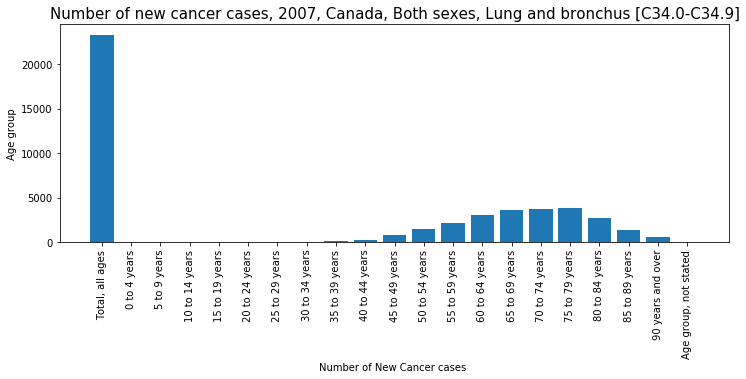

In [67]:
# Plot our table 
# Specifying the figure size
figure(figsize=(12,4))
# Bar chart of data subset
plt.bar(subset_1["Age group"] , subset_1["VALUE"], label=cancer)
# Add a title
plt.title(str(charac) + ", " + str(year) + ", " + str(geoLoc) + ", " + str(sp_sex)\
        +", " + str(cancer)  , fontsize=15 )
# Add x y labels
plt.xlabel("Number of New Cancer cases ", fontsize=10)
plt.ylabel("Age group", fontsize=10)
# Rotate x axis label
plt.xticks(rotation=90);

<h2 align='center'>Remarks</h2>
We see that there is an increase in number of new cancer cases, lung and bronchus cancer, as individuals age. 

<h2 align='center'>Generalizing</h2>

In the next section we will define a function that takes as input subcategories of the data and returns a barplot. 

In [73]:
def bar_plot_subcategories(year, sp_sex, geoLoc, charac,cancer):
    subset_1 = clean_cancer_data[ (clean_cancer_data["REF_DATE"] == year ) & \
                             (clean_cancer_data["Sex"] == sp_sex ) & \
                            (clean_cancer_data["GEO"]==geoLoc) & \
                             (clean_cancer_data["Characteristics"]==charac) &\
                  (clean_cancer_data["Primary types of cancer (ICD-O-3)"] == cancer)
                 ] 
    # Plot our table 
    # Specifying the figure size
    figure(figsize=(12,4))
    # Bar chart of data subset
    plt.bar(subset_1["Age group"] , subset_1["VALUE"], label=cancer)
    # Add a title
    plt.title(str(charac) + ", " + str(year) + ", " + str(geoLoc) + ", " + str(sp_sex)\
            +", " + str(cancer)  , fontsize=15 )
    # Add x y labels
    plt.xlabel("Number of New Cancer cases ", fontsize=10)
    plt.ylabel("Age group", fontsize=10)
    # Rotate x axis label
    plt.xticks(rotation=90);

In [ ]:
# Suppose I am interested in the following subset
year = dates[15]
sp_sex = sex[0]
sp_age = age_group[7]
geoLoc = geog[0]
cancer = 'Lung and bronchus [C34.0-C34.9]'
charac = 'Number of new cancer cases'